In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 150

In [3]:
# fetch adult dataset
X, y = fetch_data('adult', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(48842, 14)
(48842,)


In [4]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
)

param_bounds = {
    'learning_rate':[1e-6,1.0],
    'n_estimators':[1,10000],
    'max_leaf_nodes':[2,13]
}

In [5]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

opt = FCVOpt(clf,param_bounds,sqrt_mcr,
             kernel="matern",
             logscale=np.array([0,1]),max_iter=30,
             integer = [1,2],
             seed=1,verbose=2,
             n_folds=5,n_init=4)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 4.030e-01 2.871e-01 7.446e-02
     1 3.901e-01 2.981e-01 6.777e-02
     2 3.773e-01 2.862e-01 7.702e-02
     3 3.784e-01 2.799e-01 8.282e-02
     4 3.836e-01 2.996e-01 7.002e-02
     5 3.672e-01 2.860e-01 6.873e-02
     6 3.656e-01 2.889e-01 6.669e-02
     7 3.640e-01 2.993e-01 6.466e-02
     8 3.604e-01 3.043e-01 6.801e-02
     9 3.624e-01 3.139e-01 6.609e-02
  iter    f_best   acq_best    sigma_f
    10 3.580e-01 3.256e-01 6.402e-02
    11 3.566e-01 3.322e-01 6.652e-02
    12 3.594e-01 3.360e-01 6.878e-02
    13 3.584e-01 3.316e-01 6.816e-02
    14 3.561e-01 3.375e-01 6.859e-02
    15 3.503e-01 3.196e-01 6.573e-02
    16 3.499e-01 3.355e-01 7.118e-02
    17 3.522e-01 3.393e-01 6.941e-02
    18 3.519e-01 3.395e-01 7.098e-02
    19 3.553e-01 3.433e-01 6.858e-02
  iter    f_best   acq_best    sigma_f
    20 3.547e-01 3.443e-01 6.263e-02
    21 3.532e-01 3.391e-01 7.043e-02
    22 3.541e-01 3.418e-01 6.967e-02
    23 3.545e-01 3.424e-01 6.645

{'x_best': array([7.18314262e-03, 1.00000000e+04, 1.30000000e+01]),
 'f_best': 0.35353075563030373,
 'acq_cand': 0.34568584108389433,
 'x_cand': array([7.18314262e-03, 1.00000000e+04, 1.30000000e+01])}

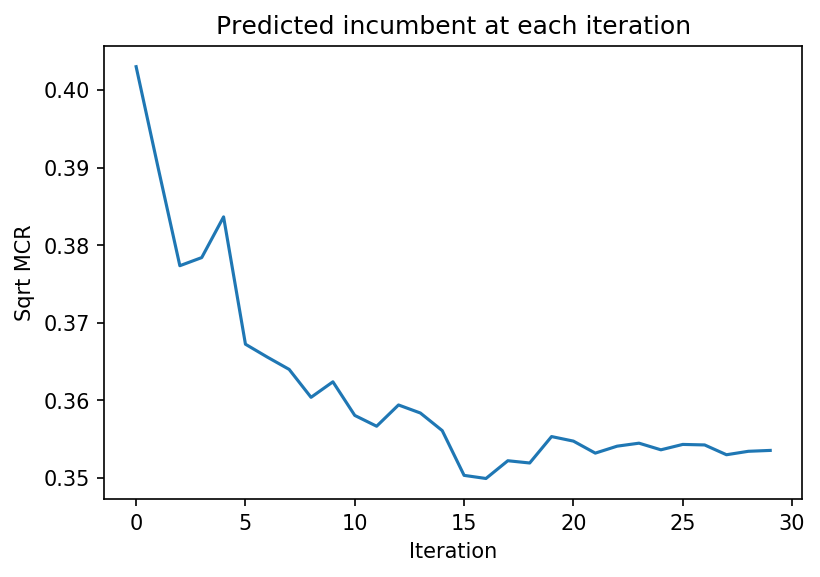

In [6]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

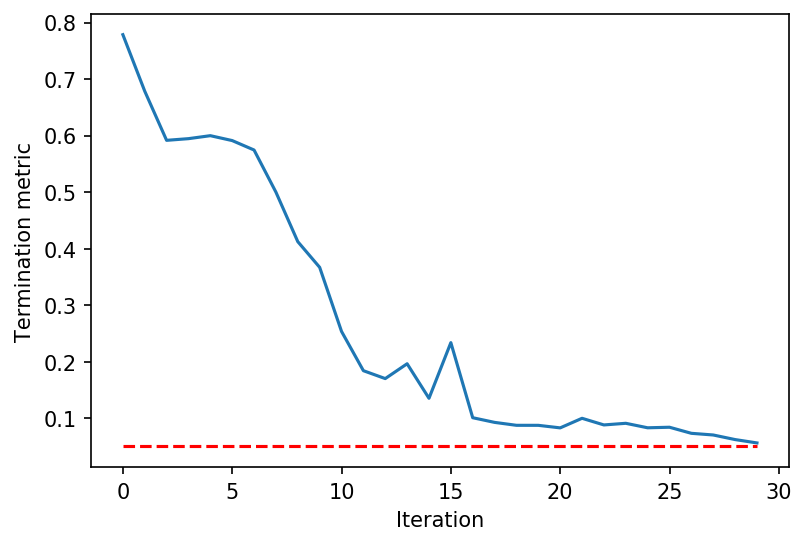

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()